In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('transaction.csv')
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254585 entries, 0 to 1254584
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   created_at              1254585 non-null  object 
 1   customer_id             1254585 non-null  int64  
 2   booking_id              1254585 non-null  object 
 3   session_id              1254585 non-null  object 
 4   payment_method          1254585 non-null  object 
 5   payment_status          1254585 non-null  object 
 6   promo_amount            1254585 non-null  int64  
 7   promo_code              481139 non-null   object 
 8   shipment_fee            1254585 non-null  int64  
 9   shipment_date_limit     1254585 non-null  object 
 10  shipment_location_lat   1254585 non-null  float64
 11  shipment_location_long  1254585 non-null  float64
 12  total_amount            1254585 non-null  int64  
 13  product_id              1254585 non-null  int64  
 14  qu

In [4]:
df.isnull().sum()

created_at                     0
customer_id                    0
booking_id                     0
session_id                     0
payment_method                 0
payment_status                 0
promo_amount                   0
promo_code                773446
shipment_fee                   0
shipment_date_limit            0
shipment_location_lat          0
shipment_location_long         0
total_amount                   0
product_id                     0
quantity                       0
item_price                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

### 결측치

In [6]:
df['promo_code'].unique()

array(['WEEKENDSERU', nan, 'WEEKENDMANTAP', 'AZ2022', 'LIBURDONG',
       'BUYMORE', 'XX2022', 'STARTUP', 'SC2022'], dtype=object)

In [7]:
# promo_code 값은 할인쿠폰 코드로 예상됨
# promo_code 결측치 → Not Promoted 로 대체

df['promo_code'] = df['promo_code'].replace(np.nan, 'Not Promoted')
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


In [8]:
df.isnull().sum()

created_at                0
customer_id               0
booking_id                0
session_id                0
payment_method            0
payment_status            0
promo_amount              0
promo_code                0
shipment_fee              0
shipment_date_limit       0
shipment_location_lat     0
shipment_location_long    0
total_amount              0
product_id                0
quantity                  0
item_price                0
dtype: int64

### created_at

In [9]:
# created_at 컬럼을 통해 연도 컬럼 생성

def year(created_at):
    return int(created_at[:4])

df['year'] = df['created_at'].apply(year)
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,2018
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,2018
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,2018
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,2018
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,2018


In [10]:
# datetime 형식으로 변환

df['created_at'] = pd.to_datetime(df['created_at'])
df.head()

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year
0,2018-07-29 15:22:01.458193+00:00,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,2018
1,2018-07-30 12:40:22.365620+00:00,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,2018
2,2018-09-15 11:51:17.365620+00:00,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,2018
3,2018-11-01 11:23:48.365620+00:00,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,2018
4,2018-12-18 11:20:30.365620+00:00,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,2018


### booking_id

주문예약번호로, 거래가 발생한 시간(created_at)이 같으면 거래를 주문한 고객(customer_id)도 같을 것으로 추정

→ 만약 같다면, booking_id는 굳이 없어도 되는 컬럼으로 판단

In [11]:
df.duplicated(['booking_id']).sum()

402001

In [12]:
df.duplicated(['created_at', 'booking_id', 'customer_id']).sum()

402001

In [13]:
df.duplicated(['created_at']).sum()

402001

In [14]:
# 인덱스 추출 후, 같은 데이터인지 확인
print([i for i in df[df.duplicated(['booking_id'])].index] == [i for i in df[df.duplicated(['created_at', 'booking_id', 'customer_id'])].index])
print([i for i in df[df.duplicated(['booking_id'])].index] == [i for i in df[df.duplicated(['created_at'])].index])

True
True


In [15]:
# booking_id가 같으면 created_at도 같음 → booking_id 컬럼 삭제
df = df.drop(['booking_id'], axis=1)
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,2018
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,2018
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,2018
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,2018
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,2018


### session_id

사용자가 웹 사이트에 접속하면 서버는 고유한 session_id를 생성 → click_stream_new 데이터를 통해 얼마나 오래 머물렀는지 확인 가능

### payment_method

In [16]:
df['payment_method'].unique()

array(['Debit Card', 'Credit Card', 'OVO', 'LinkAja', 'Gopay'],
      dtype=object)

In [17]:
# Debit Card : 체크카드
# Credit Card : 신용카드
# OVO(오포) : 인도네시아 결제수단 (전자지갑 어플)
# GOPAY(고페이) : 인도네시아 결제수단
# LinkAja(린카자) : 인도네시아의 디지털 지갑 서비스

In [18]:
# 인도네시아의 결제시스템

# 인도네시아는 아직도 은행계좌를 가지고 있지 않은 사람들이 많은데, 이유를 보면
# 1. 빈부격차가 커서 아직 기본월급 30만원도 안되는 경우가 많아서 은행업무를 볼 일도 많지 않고, 은행에서 내야 하는 수수료도 꽤 큰 돈임
# 2. 은행을 못믿음 (많은 서민들이 은행보다는 금으로 가지고 있는게 좋다고 생각함)
# 3. 종교적인 이유 (샤리아법에 의해 무슬림들의 경제개념은 조금 다름 >> 샤리아법을 기반으로 한 은행 존재)

In [19]:
# BUT 특이사항 존재

# 컴퓨터의 확산보다 빠르게 3G핸드폰이 확산되면서 온라인 결제가 빠르게 확산됨
# >> 온라인 결제를 더욱 강화시킴

# >> 인도네시아는 은행의 보편화가 이루어지지 않았기 때문에 온라인 결제시스템이 우리 나라와 다름
# OVO나 GOPAY가 은행 / 신용카드의 역할을 대신함
# OVO는 온라인 최대 기업 tokopedia와 손을 잡고 있고, GOPAY는 jingdung 등과 손을 잡고 있기 때문에 온라인 쇼핑을 하는 경우라면 필수

In [20]:
df['payment_method'].value_counts(normalize=True).round(4)

payment_method
Credit Card    0.3506
Gopay          0.2005
OVO            0.1985
Debit Card     0.1614
LinkAja        0.0889
Name: proportion, dtype: float64

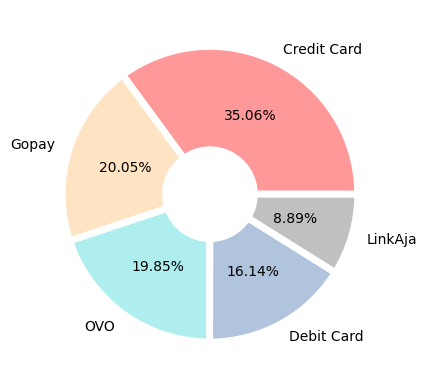

In [21]:
# 지불 방식 비율 시각화
payment_method_list = ['Credit Card', 'Gopay', 'OVO', 'Debit Card', 'LinkAja']
payment_method_ratio = [i for i in (df['payment_method'].value_counts(normalize=True))]
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(payment_method_ratio, labels=payment_method_list, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

### payment_status

In [22]:
df['payment_status'].unique()

array(['Success', 'Failed'], dtype=object)

In [23]:
df.columns

Index(['created_at', 'customer_id', 'session_id', 'payment_method',
       'payment_status', 'promo_amount', 'promo_code', 'shipment_fee',
       'shipment_date_limit', 'shipment_location_lat',
       'shipment_location_long', 'total_amount', 'product_id', 'quantity',
       'item_price', 'year'],
      dtype='object')

In [24]:
# 같은 결제수단으로 재시도
df[df.duplicated(['customer_id', 'session_id', 'payment_method', 'promo_amount', 'promo_code',
                  'shipment_fee', 'shipment_location_lat', 'shipment_location_long', 'total_amount',
                  'product_id', 'quantity', 'item_price'])]

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year


In [25]:
# 다른 결제수단으로 재시도
df[df.duplicated(['customer_id', 'session_id', 'promo_amount', 'promo_code',
                  'shipment_fee', 'shipment_location_lat', 'shipment_location_long',
                  'total_amount', 'product_id', 'quantity', 'item_price'])]

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year


In [26]:
# 결제 실패 시, 결제를 재시도하지는 않음

### promo_code

In [27]:
df['promo_code'].value_counts(normalize=True).round(4)

promo_code
Not Promoted     0.6165
AZ2022           0.1047
BUYMORE          0.0784
WEEKENDSERU      0.0729
XX2022           0.0524
LIBURDONG        0.0248
WEEKENDMANTAP    0.0239
SC2022           0.0133
STARTUP          0.0131
Name: proportion, dtype: float64

In [28]:
df.query('promo_code != "Not Promoted"')['promo_code'].value_counts(normalize=True).round(4)

promo_code
AZ2022           0.2729
BUYMORE          0.2045
WEEKENDSERU      0.1902
XX2022           0.1368
LIBURDONG        0.0646
WEEKENDMANTAP    0.0624
SC2022           0.0346
STARTUP          0.0341
Name: proportion, dtype: float64

In [29]:
# 각 할인코드가 무엇을 의미하는지 몰라서 인사이트를 얻기 힘듬,,

### shipment_fee

In [30]:
df['shipment_fee'].unique()

array([10000,     0,  5000, 50000, 25000, 15000], dtype=int64)

In [31]:
df['shipment_fee'].value_counts(normalize=True).round(3)

shipment_fee
10000    0.541
0        0.259
5000     0.069
15000    0.066
25000    0.033
50000    0.032
Name: proportion, dtype: float64

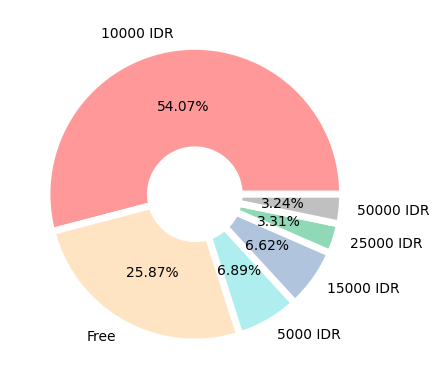

In [32]:
# 배송비 비율 시각화
payment_method_list = ['10000 IDR', 'Free', '5000 IDR', '15000 IDR', '25000 IDR', '50000 IDR']
payment_method_ratio = [i for i in (df['shipment_fee'].value_counts(normalize=True))]
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(payment_method_ratio, labels=payment_method_list, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

### shipment_date_limit

shipment_date_limit 컬럼과 created_at 컬럼을 통해 배송에 걸리는 시간을 나타내는 컬럼 생성

In [33]:
# shipment_date_limit 컬럼을 datetime 형식으로 변환
df['shipment_date_limit'] = pd.to_datetime(df['shipment_date_limit'])

# 배송시간 컬럼 생성
df['shipment_time'] = df['shipment_date_limit'] - df['created_at']
df['shipment_time'] = df['shipment_time'].apply(lambda x: f"{x.days} days")
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,year,shipment_time
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247,2018,4 days
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526,2018,3 days
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174,2018,2 days
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012,2018,4 days
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753,2018,5 days


In [34]:
df['shipment_time'].value_counts(normalize=True)

shipment_time
4 days    0.201168
3 days    0.199904
2 days    0.199878
5 days    0.198380
1 days    0.192594
6 days    0.008076
Name: proportion, dtype: float64

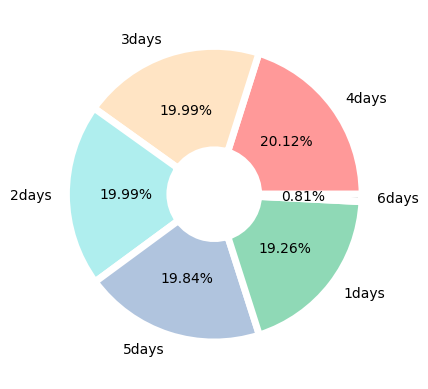

In [35]:
# 배송에 걸리는 기간 시각화
shipment_time_list = ['4days', '3days', '2days', '5days', '1days', '6days']
shipment_time_ratio = [i for i in (df['shipment_time'].value_counts(normalize=True))]
colors = ['#ff9999', 'bisque', 'paleturquoise', 'lightsteelblue', '#8fd9b6', 'silver']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(shipment_time_ratio, labels=shipment_time_list, autopct='%.2f%%', colors=colors, wedgeprops=wedgeprops)
plt.show()

### shipment_location_lat & shipment_location_long

In [36]:
df.rename(columns={'shipment_location_lat':'shipment_lat', 'shipment_location_long':'shipment_long'}, inplace=True)
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_lat,shipment_long,total_amount,product_id,quantity,item_price,year,shipment_time
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247,2018,4 days
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526,2018,3 days
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174,2018,2 days
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012,2018,4 days
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753,2018,5 days


<Axes: xlabel='shipment_long', ylabel='shipment_lat'>

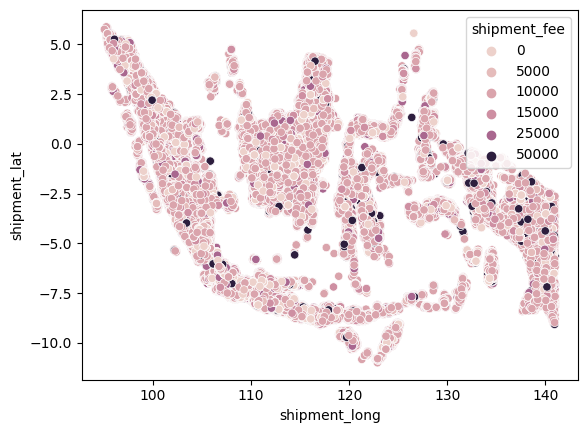

In [37]:
sns.scatterplot(data=df, x="shipment_long" , y="shipment_lat" , hue="shipment_fee")

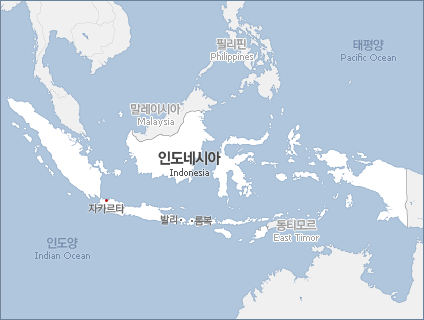

In [38]:
# 특정 지역에 배송비가 높지는 않은 것으로 판단

### 배송 거리 컬럼 추가

배송 거리 컬럼을 추가하기 위해 transaction의 customer_id를 토대로 고객의 위치(위도, 경도)를 가져옴

In [39]:
customer = pd.read_csv('EDA_customer.csv')
customer = customer.sort_values(by='customer_id', ignore_index=True)
customer.head()

,customer_id,gender,age,join_age,device,device_version,device_version2,home_lat,home_long,home_location,birthdate,first_join_date
0,1,F,25,18,iPhone,7.1.2,7,-2.728020,114.215521,Kalimantan Tengah,1999-03-12,2016-11-27
1,2,F,33,31,Android,4.3,4,-6.010465,107.292582,Jawa Barat,1991-01-18,2021-12-25
2,3,M,38,33,Android,3.2.3,3,-6.151858,106.945839,Jakarta Raya,1986-07-12,2018-08-25
3,4,F,29,27,Android,1.1,1,0.349326,109.061486,Kalimantan Barat,1995-03-17,2021-03-22
4,5,M,30,28,iPad,4.2.1,4,-6.138983,106.873723,Jakarta Raya,1994-07-21,2021-12-18


In [40]:
# customer_id에 따른 위도(latitude) 딕셔너리 생성
lat_dict = {}
for i in range(len(customer)):
    lat_dict[i+1] = customer['home_lat'].iloc[i]

# customer_id에 따른 경도(longitude) 딕셔너리 생성
long_dict = {}
for i in range(len(customer)):
    long_dict[i+1] = customer['home_long'].iloc[i]

In [41]:
# customer_id에 따른 위도/경도 컬럼 생성
df['customer_lat'] = df['customer_id'].map(lat_dict)
df['customer_long'] = df['customer_id'].map(long_dict)
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_lat,shipment_long,total_amount,product_id,quantity,item_price,year,shipment_time,customer_lat,customer_long
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247,2018,4 days,-6.122897,106.876500
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526,2018,3 days,-3.602334,120.363824
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174,2018,2 days,-3.602334,120.363824
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012,2018,4 days,-3.602334,120.363824
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753,2018,5 days,-3.602334,120.363824


In [42]:
# 알맞게 들어갔는지 확인
df.duplicated(['customer_id', 'customer_lat', 'customer_long']).sum() + len(df['customer_id'].unique()) == df.shape[0]

True

In [43]:
# 배송출발지와 배송도착지 사이의 거리 컬럼 생성
from haversine import haversine

df['distance(km)'] = ''
for i in range(len(df)):
    shipment = (df['shipment_lat'].iloc[i], df['shipment_long'].iloc[i])
    customer = (df['customer_lat'].iloc[i], df['customer_long'].iloc[i])
    df['distance(km)'].iloc[i] = haversine(shipment, customer)

df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_lat,shipment_long,total_amount,product_id,quantity,item_price,year,shipment_time,customer_lat,customer_long,distance(km)
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,-8.227893,111.969107,199832,54728,1,191247,2018,4 days,-6.122897,106.876500,608.611583
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,3.013470,107.802514,155526,16193,1,145526,2018,3 days,-3.602334,120.363824,1577.934908
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,-2.579428,115.743885,550696,53686,4,135174,2018,2 days,-3.602334,120.363824,525.418925
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,-3.602334,120.363824,271012,20228,1,271012,2018,4 days,-3.602334,120.363824,0.0
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,-3.602334,120.363824,198753,55220,1,198753,2018,5 days,-3.602334,120.363824,0.0


In [44]:
df = df.drop(['shipment_lat', 'shipment_long', 'customer_lat', 'customer_long'], axis=1)
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km)
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,54728,1,191247,2018,4 days,608.611583
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193,1,145526,2018,3 days,1577.934908
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686,4,135174,2018,2 days,525.418925
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228,1,271012,2018,4 days,0.0
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220,1,198753,2018,5 days,0.0


### 거래 당시 나이 컬럼 추가

In [45]:
customer = pd.read_csv('EDA_customer.csv')

df = pd.merge(df, customer[['customer_id', 'birthdate']], on='customer_id', how='inner')
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),birthdate
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,54728,1,191247,2018,4 days,608.611583,2000-08-20
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193,1,145526,2018,3 days,1577.934908,1996-03-15
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686,4,135174,2018,2 days,525.418925,1996-03-15
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228,1,271012,2018,4 days,0.0,1996-03-15
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220,1,198753,2018,5 days,0.0,1996-03-15


In [46]:
from dateutil.relativedelta import relativedelta

df['created_at'] = df['created_at'].astype(str)

# 거래 당시 나이 컬럼 생성 (만 나이)
def buy_age(row):
    transaction_date = datetime.strptime(row['created_at'], '%Y-%m-%d %H:%M:%S.%f%z')
    birth_date = datetime.strptime(row['birthdate'], '%Y-%m-%d').replace(tzinfo=transaction_date.tzinfo)
    
    transaction_age = relativedelta(transaction_date, birth_date)

    return transaction_age.years

df['buy_age'] = df.apply(lambda row: buy_age(row), axis=1)
df.drop(['birthdate'], axis=1, inplace=True)
df.head()

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,54728,1,191247,2018,4 days,608.611583,17
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193,1,145526,2018,3 days,1577.934908,22
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686,4,135174,2018,2 days,525.418925,22
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228,1,271012,2018,4 days,0.0,22
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220,1,198753,2018,5 days,0.0,22


In [47]:
# csv 파일 변환
df.to_csv("EDA_transaction.csv", index=False, encoding="utf-8-sig", mode="w")

### 구매 주기

In [48]:
tr_del = df.drop_duplicates(subset='created_at').reset_index(drop=True)

tr_del['created_at'] = pd.to_datetime(tr_del['created_at'])
tr_del['purchase_cycle'] = tr_del.groupby('customer_id')['created_at'].diff().dt.days
tr_del

,created_at,customer_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,total_amount,product_id,quantity,item_price,year,shipment_time,distance(km),buy_age,purchase_cycle
0,2018-07-29 15:22:01.458193+00:00,5868,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03 05:07:24.812676+00:00,199832,54728,1,191247,2018,4 days,608.611583,17,NaN
1,2018-07-30 12:40:22.365620+00:00,4774,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,Not Promoted,10000,2018-08-03 01:29:03.415705+00:00,155526,16193,1,145526,2018,3 days,1577.934908,22,NaN
2,2018-09-15 11:51:17.365620+00:00,4774,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,Not Promoted,10000,2018-09-18 08:41:49.422380+00:00,550696,53686,4,135174,2018,2 days,525.418925,22,46.0
3,2018-11-01 11:23:48.365620+00:00,4774,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,Not Promoted,0,2018-11-05 17:42:27.954235+00:00,271012,20228,1,271012,2018,4 days,0.0,22,46.0
4,2018-12-18 11:20:30.365620+00:00,4774,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,Not Promoted,0,2018-12-23 17:24:07.361785+00:00,198753,55220,1,198753,2018,5 days,0.0,22,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21 22:10:05.074873+00:00,25121,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,Not Promoted,0,2021-09-27 00:43:40.992167+00:00,226820,30642,2,113410,2021,5 days,0.0,28,313.0
852580,2021-12-09 07:35:18.222046+00:00,34829,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12 07:52:44.803822+00:00,359203,19394,1,354213,2021,3 days,918.726839,15,NaN
852581,2021-12-11 01:20:36.944593+00:00,99645,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12 13:28:22.848703+00:00,1158159,13079,4,288835,2021,1 days,0.0,30,NaN
852582,2019-12-18 11:01:09.623382+00:00,87319,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23 22:56:46.831720+00:00,184143,11312,1,188646,2019,5 days,0.0,12,NaN


In [49]:
data = tr_del[['customer_id', 'purchase_cycle']]
data

,customer_id,purchase_cycle
0,5868,NaN
1,4774,NaN
2,4774,46.0
3,4774,46.0
4,4774,46.0
...,...,...
852579,25121,313.0
852580,34829,NaN
852581,99645,NaN
852582,87319,NaN


In [50]:
data = data.dropna().reset_index(drop=True)
cycle1 = data.groupby('customer_id', as_index=False)['purchase_cycle'].mean().round()
cycle1.rename(columns={'purchase_cycle':'mean_purchase_cycle'}, inplace=True)
cycle1

,customer_id,mean_purchase_cycle
0,3,28.0
1,8,76.0
2,9,67.0
3,15,207.0
4,17,671.0
...,...,...
40459,99989,120.0
40460,99991,175.0
40461,99992,63.0
40462,99995,12.0


In [51]:
cycle2 = data.groupby('customer_id', as_index=False)['purchase_cycle'].median()
cycle2.rename(columns={'purchase_cycle':'median_purchase_cycle'}, inplace=True)
cycle2

,customer_id,median_purchase_cycle
0,3,28.0
1,8,76.0
2,9,67.0
3,15,207.0
4,17,671.0
...,...,...
40459,99989,120.0
40460,99991,175.0
40461,99992,63.0
40462,99995,12.0


In [52]:
cycle = pd.merge(cycle1, cycle2, on='customer_id', how='inner')
cycle

,customer_id,mean_purchase_cycle,median_purchase_cycle
0,3,28.0,28.0
1,8,76.0,76.0
2,9,67.0,67.0
3,15,207.0,207.0
4,17,671.0,671.0
...,...,...,...
40459,99989,120.0,120.0
40460,99991,175.0,175.0
40461,99992,63.0,63.0
40462,99995,12.0,12.0


In [53]:
# 구매주기 csv 파일 변환
cycle.to_csv("customer_purchase_cycle.csv", index=False, encoding="utf-8-sig", mode="w")